In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
import tensorflow as tf 
import math
from tensorflow.keras import layers,models

In [12]:
batch_size=32
image_size=256
channels=3
epochs=30


In [13]:
dataset= tf.keras.preprocessing.image_dataset_from_directory('plant_image',shuffle=True,batch_size=batch_size,image_size=(image_size,image_size),seed=123)

Found 2138 files belonging to 3 classes.


In [14]:
clases_name=dataset.class_names
clases_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [15]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [19]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
(32,)
[1 1 0 0 1 1 1 0 0 1 2 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1]


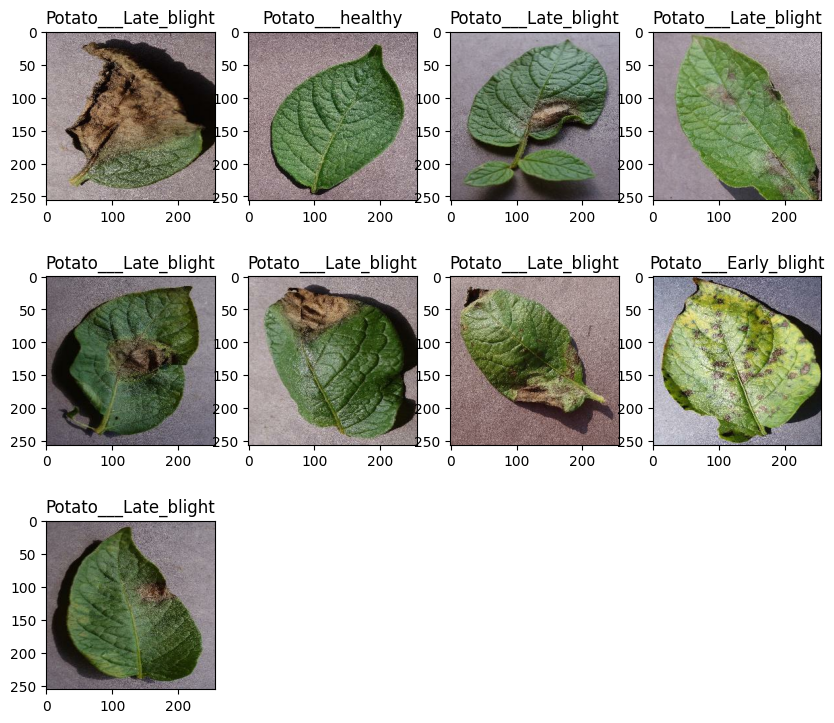

In [34]:
plt.figure(figsize=(10,9))
for image_batch,label_batch in dataset.take(1):
    for i in range(9):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(clases_name[label_batch[i]])
        plt.axis=('off')

In [26]:
clases_name[label_batch[0]]

'Potato___Late_blight'

In [35]:
len(dataset)

67

In [36]:
train_size=0.8
len(dataset)*0.8

53.6

In [37]:
test_size=0.2
len(dataset)*0.2

13.4

In [38]:
train_ds=dataset.take(53)
len(train_ds)

53

In [39]:
test_ds=dataset.skip(53)
len(test_ds)

14

In [41]:
val_size=0.1
len(dataset)*0.1

6.7

In [42]:
val_ds=test_ds.skip(7)
len(val_ds)

7

In [51]:
def get_dataset_partion_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(len(dataset)*train_split)
    val_size=int(len(dataset)*val_split)
    test_size=int(len(dataset)*test_split)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [52]:
train_ds,val_ds,test_ds=get_dataset_partion_tf(dataset)
print(len(train_ds))

53


In [53]:
print(len(test_ds))

8


In [54]:
print(len(val_ds))

6


In [55]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [62]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1./255)
])

In [58]:
from tensorflow.keras import layers,models

In [63]:
#data agumentation
data_agumentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [68]:
input_shape=(batch_size,image_size,image_size,channels)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')])
model.build(input_shape=input_shape)

C:\Users\aswin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,323 (3.42 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [72]:
history=model.fit(train_ds,epochs=6,validation_data=val_ds,batch_size=batch_size,verbose=1)

Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 566ms/step - accuracy: 0.9334 - loss: 0.1790 - val_accuracy: 0.9479 - val_loss: 0.1375
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 592ms/step - accuracy: 0.9357 - loss: 0.1731 - val_accuracy: 0.9219 - val_loss: 0.1975
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 602ms/step - accuracy: 0.9446 - loss: 0.1592 - val_accuracy: 0.9375 - val_loss: 0.1430
Epoch 4/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 631ms/step - accuracy: 0.9452 - loss: 0.1446 - val_accuracy: 0.9115 - val_loss: 0.2091
Epoch 5/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 638ms/step - accuracy: 0.9475 - loss: 0.1481 - val_accuracy: 0.8438 - val_loss: 0.5180
Epoch 6/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 628ms/step - accuracy: 0.9469 - loss: 0.1420 - val_accuracy: 0.9115 - val_loss: 0.2249


In [73]:
scores=model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9280 - loss: 0.1620


[0.16196459531784058, 0.9279999732971191]

In [74]:
history

In [76]:
history.params

{'verbose': 1, 'epochs': 6, 'steps': 53}

In [78]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [79]:
history.history['accuracy'][:5]

[0.9333726167678833,
 0.9357311129570007,
 0.9445754885673523,
 0.9451650977134705,
 0.9475235939025879]

In [80]:
len(history.history['accuracy'])

6

In [84]:
acc=history.history['accuracy']
loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']
epochs=range(len(acc))

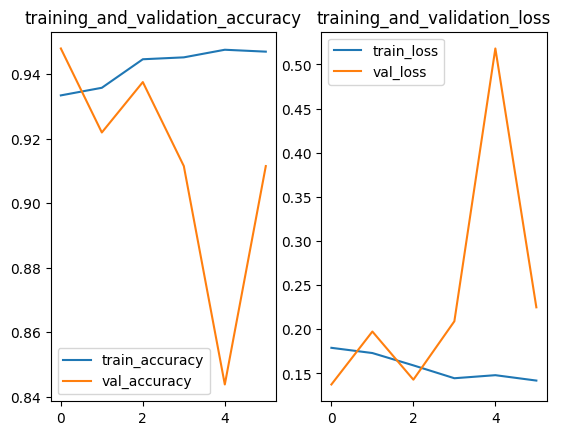

In [92]:

plt.subplot(1,2,1)
plt.plot(epochs,acc,label='train_accuracy')
plt.plot(epochs,val_accuracy,label='val_accuracy')
plt.legend()
plt.title('training_and_validation_accuracy')
plt.subplot(1,2,2)
plt.plot(epochs,loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()
plt.title('training_and_validation_loss')
plt.show()


In [83]:
len(range(epochs))

30

first image to predict
label_batch: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
predict_label: Potato___Late_blight


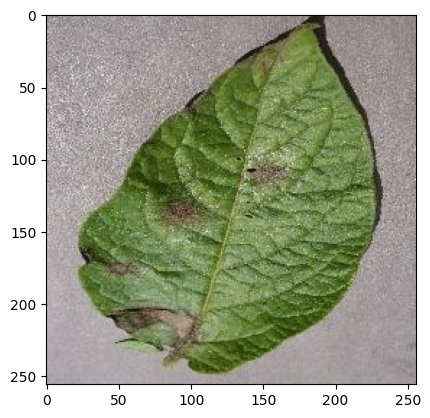

In [94]:
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    print('first image to predict')
    plt.imshow(first_image)
    print('label_batch:',clases_name[first_label])
    batch_prediction=model.predict(image_batch)
    print('predict_label:',clases_name[np.argmax(batch_prediction[0])])

In [111]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=clases_name[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


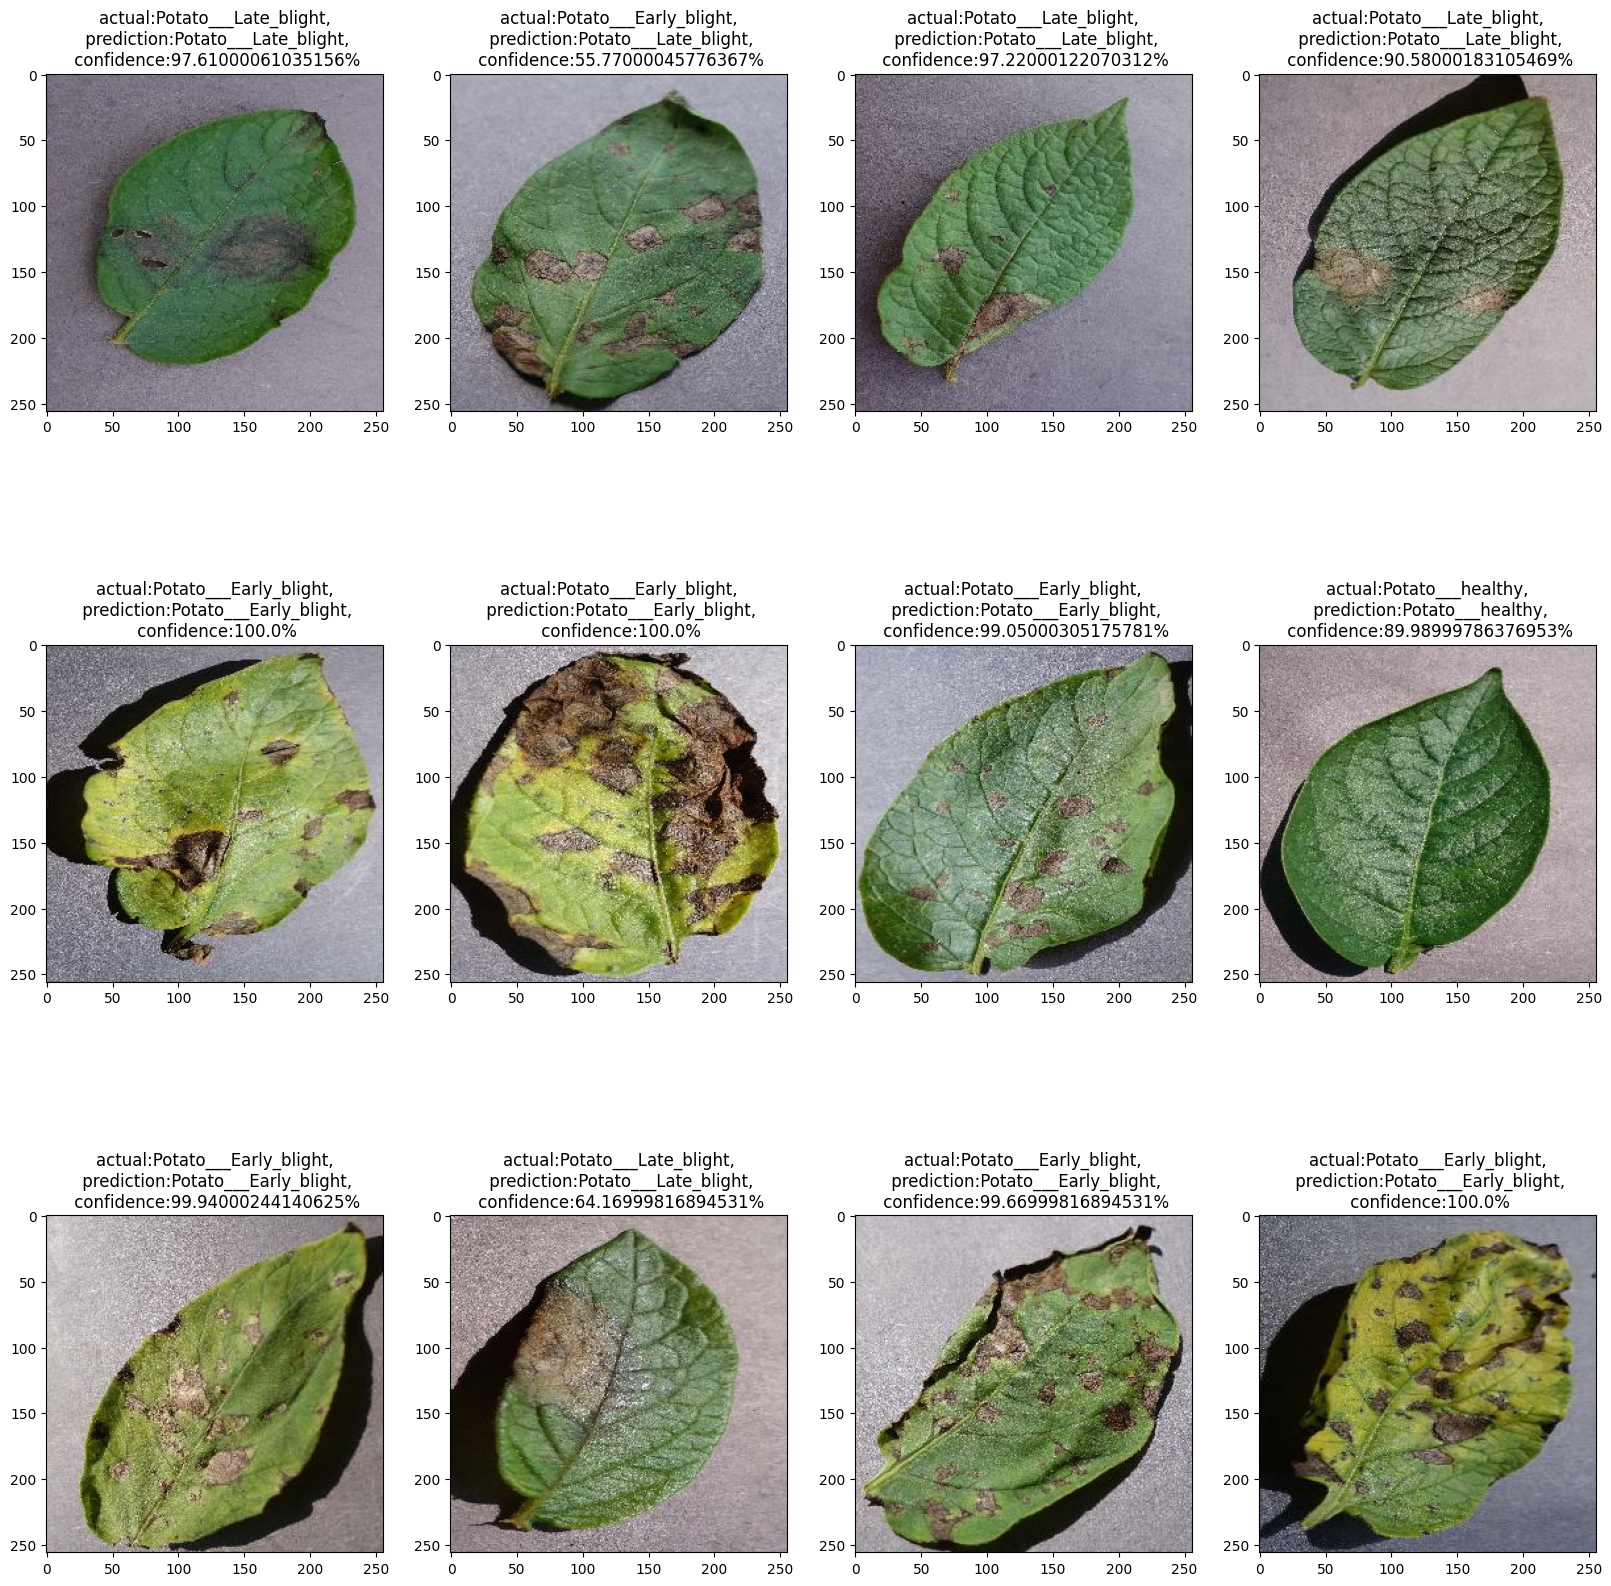

In [123]:
plt.figure(figsize=(20,21))
for image,labels in test_ds.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,image[i].numpy())
        actual_class=clases_name[labels[i]]
        plt.title(f'actual:{actual_class},\n prediction:{predicted_class},\n confidence:{confidence}%')
        

In [130]:
model_version = 1
model.export(f"C:/Users/aswin/projects/deeplearning project/model/{model_version}")


INFO:tensorflow:Assets written to: C:/Users/aswin/projects/deeplearning project/model/1\assets


INFO:tensorflow:Assets written to: C:/Users/aswin/projects/deeplearning project/model/1\assets


Saved artifact at 'C:/Users/aswin/projects/deeplearning project/model/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2385894644944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2385894645904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386248998864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386248999632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386248998480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386248998672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386249000592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386248997328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386249000976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386249000784: TensorSpec(shape=(), dtype=tf.resource, name=None